# Task 2: Customer Preference Analysis

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### 1. Analyze the relationship between the type of cuisine and the restaurant's rating.

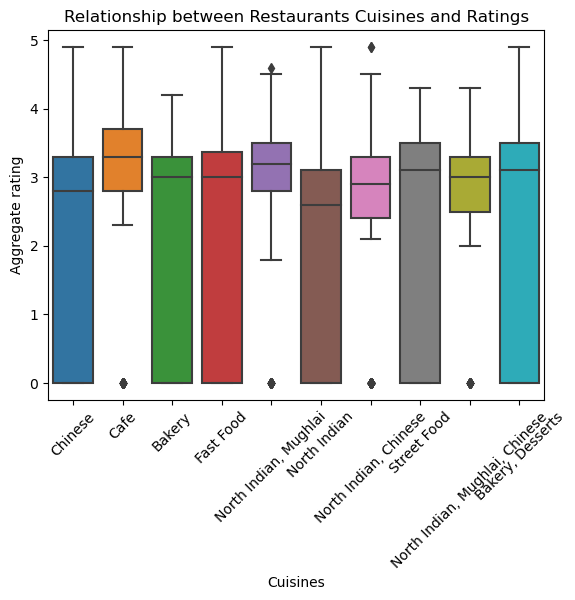

In [98]:
# FIltering the dataset to include only top 10 in the relation variable
Relation = df[df['Cuisines'].isin(df['Cuisines'].value_counts().nlargest(10).index)]

# Creating the boxplot
sns.boxplot(data = Relation, x = 'Cuisines', y = 'Aggregate rating')
plt.xticks(rotation=45)
plt.title("Relationship between Restaurants Cuisines and Ratings")
plt.show()

### 2. Identify the most popular cuisines among customers based on the number of votes.

In [99]:
# To get the Top Cuisines based on votes of people
Popular_Cuisine = df.groupby('Cuisines')['Votes'].sum().nlargest(10)
Popular_Cuisine

print(f"Top Cuisines among custmers based on number of votes\n\n{Popular_Cuisine}")

Top Cuisines among custmers based on number of votes

Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


### 3. Determine if there are any specific cuisines that tend to receive higher ratings.

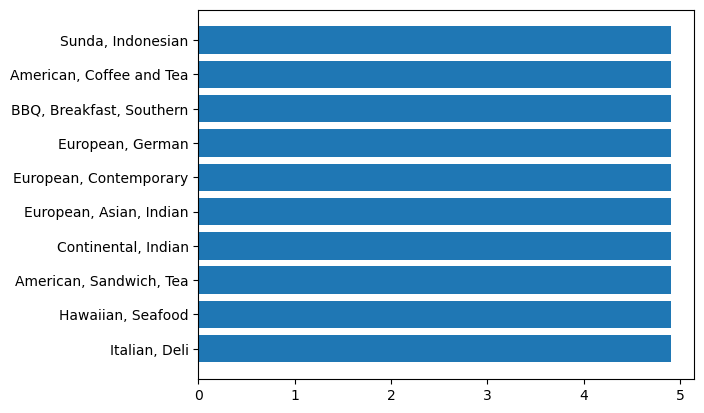

In [100]:
cuisine_Rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
cuisine_Rating

# colors = ['grey', 'orange', 'green', 'red', 'purple']
plt.barh(cuisine_Rating.index, cuisine_Rating.values)
# sns.barplot(data =df, x =cuisine_Rating.index, y = cuisine_Rating.values, palette = 'dark')

plt.show()

### Conclusion

In [101]:
# 1. Different food effects the restaurant rating, as North Indian and Chinese food rating can fluctuate and other 
#    cafes & fast foods are tend to be more consistent. 
# 2. Filtered Through the voting North Indian, Mughlai and North Indian Cuisines are most popular
# 3. Sunda, American, BBQ, European, Contenantal, American, Hawaiian and Italian Cuisines are having highest rating.